### Import libraries

In [ ]:
# Import required packages

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


## Load the Data

In [ ]:
train_df = pd.read_csv("path")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [ ]:
test_df = pd.read_csv("path")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data


In [ ]:
train_df.info()
train_df.isnull().sum()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [ ]:
test_df.info()
test_df.isnull().sum()
test_df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  object 
 4   PaymentMethod             104480 non-null  object 
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  object 
 13  UserRating                104480 non-null  f

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,135.445204,35,Comedy,1.411831,7,Female,14,No,Yes,UTKREC613O
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,114.868640,17,Drama,2.783849,2,Male,8,Yes,No,MDB4E477PS
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,109.583153,31,Comedy,2.991527,1,Male,12,No,Yes,IPDIA02ZE1
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,115.153570,1,Drama,4.998019,0,Female,12,Yes,No,ITLFTPRJGV
104479,110,7.438385,818.222399,Basic,Bank transfer,Yes,Both,No,Computer,34.146174,132.606801,29,Drama,4.679910,2,Female,7,No,Yes,Y204GZY6NE


In [8]:
# checked data
print(train_df['Gender'].unique())
print(train_df['PaperlessBilling'].unique())
print(train_df['MultiDeviceAccess'].unique())
print(train_df['ParentalControl'].unique())
print(train_df['SubtitlesEnabled'].unique())
print(train_df['DeviceRegistered'].unique())
print(train_df['ContentType'].unique())
print(train_df['SubscriptionType'].unique())
print(train_df['PaymentMethod'].unique())
print(train_df['GenrePreference'].unique())


['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Mobile' 'Tablet' 'Computer' 'TV']
['Both' 'Movies' 'TV Shows']
['Premium' 'Basic' 'Standard']
['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']


In [9]:
#checked data
print(train_df['Gender'].value_counts())
print(train_df['PaperlessBilling'].value_counts())
print(train_df['MultiDeviceAccess'].value_counts())
print(train_df['ParentalControl'].value_counts())
print(train_df['SubtitlesEnabled'].value_counts())
print(train_df['DeviceRegistered'].value_counts())
print(train_df['ContentType'].value_counts())
print(train_df['SubscriptionType'].value_counts())
print(train_df['PaymentMethod'].value_counts())
print(train_df['GenrePreference'].value_counts())

Female    121930
Male      121857
Name: Gender, dtype: int64
No     121980
Yes    121807
Name: PaperlessBilling, dtype: int64
No     122035
Yes    121752
Name: MultiDeviceAccess, dtype: int64
Yes    122085
No     121702
Name: ParentalControl, dtype: int64
Yes    122180
No     121607
Name: SubtitlesEnabled, dtype: int64
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: DeviceRegistered, dtype: int64
Both        81737
TV Shows    81145
Movies      80905
Name: ContentType, dtype: int64
Standard    81920
Basic       81050
Premium     80817
Name: SubscriptionType, dtype: int64
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: PaymentMethod, dtype: int64
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: GenrePreference, dtype: int64


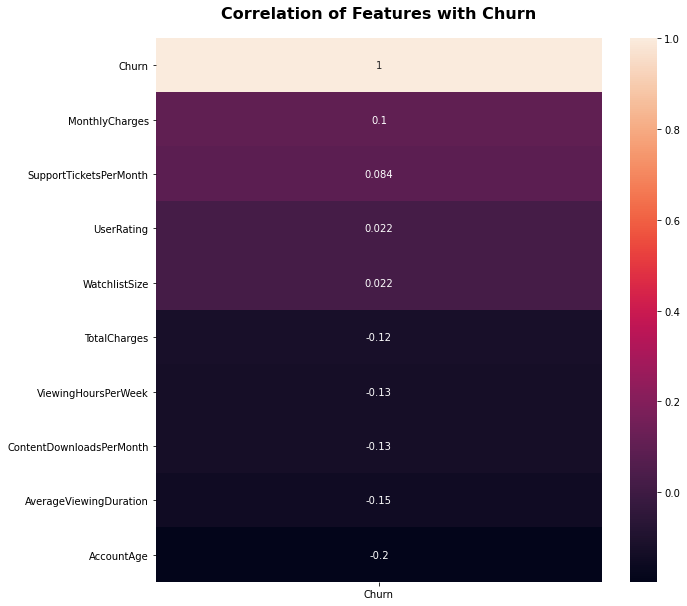

In [10]:
plt.figure(figsize=(10,10))

sns.heatmap(train_df.corr()['Churn'].sort_values(ascending=False).to_frame(), annot=True)

plt.title('Correlation of Features with Churn', fontsize=16, fontweight='bold', pad=20)
plt.show()

In [11]:
# apply one hot encoded
one_hot_encoded_data = pd.get_dummies(train_df, columns = ['Gender', 'PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled', 'DeviceRegistered', 'ContentType', 'SubscriptionType', 'PaymentMethod', 'GenrePreference'])
print(one_hot_encoded_data)

        AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0               20       11.055215    221.104302            36.758104   
1               57        5.175208    294.986882            32.450568   
2               73       12.106657    883.785952             7.395160   
3               32        7.263743    232.439774            27.960389   
4               57       16.953078    966.325422            20.083397   
...            ...             ...           ...                  ...   
243782          77        9.639902    742.272460            13.502729   
243783         117       13.049257   1526.763053            24.963291   
243784         113       14.514569   1640.146267            10.628728   
243785           7       18.140555    126.983887            30.466782   
243786          90       11.593774   1043.439704            24.972537   

        AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0                    63.531377                     

In [12]:
# change column name for the readeble purposes
one_hot_encoded_data.rename(columns={'PaymentMethod_Bank transfer':'PaymentMethod_Bank_transfer'}, inplace=True)
one_hot_encoded_data.rename(columns={'PaymentMethod_Credit card':'PaymentMethod_Credit_card'}, inplace=True)
one_hot_encoded_data.rename(columns={'PaymentMethod_Electronic check':'PaymentMethod_Electronic_check'}, inplace=True)
one_hot_encoded_data.rename(columns={'PaymentMethod_Mailed check':'PaymentMethod_Mailed_check'}, inplace=True)
one_hot_encoded_data.rename(columns={'ContentType_TV Shows':'ContentType_TV_Shows'}, inplace=True)

# checked data
one_hot_encoded_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AccountAge                      243787 non-null  int64  
 1   MonthlyCharges                  243787 non-null  float64
 2   TotalCharges                    243787 non-null  float64
 3   ViewingHoursPerWeek             243787 non-null  float64
 4   AverageViewingDuration          243787 non-null  float64
 5   ContentDownloadsPerMonth        243787 non-null  int64  
 6   UserRating                      243787 non-null  float64
 7   SupportTicketsPerMonth          243787 non-null  int64  
 8   WatchlistSize                   243787 non-null  int64  
 9   CustomerID                      243787 non-null  object 
 10  Churn                           243787 non-null  int64  
 11  Gender_Female                   243787 non-null  uint8  
 12  Gender_Male     

In [13]:
# checked data
print(one_hot_encoded_data['Gender_Female'].unique())
print(one_hot_encoded_data['Gender_Male'].unique())
print(one_hot_encoded_data['PaperlessBilling_No'].unique())
print(one_hot_encoded_data['PaperlessBilling_Yes'].unique())
print(one_hot_encoded_data['ParentalControl_No'].unique())
print(one_hot_encoded_data['ParentalControl_Yes'].unique())
print(one_hot_encoded_data['SubtitlesEnabled_No'].unique())
print(one_hot_encoded_data['SubtitlesEnabled_Yes'].unique())
print(one_hot_encoded_data['DeviceRegistered_Computer'].unique())
print(one_hot_encoded_data['DeviceRegistered_Mobile'].unique())
print(one_hot_encoded_data['DeviceRegistered_TV'].unique())
print(one_hot_encoded_data['DeviceRegistered_Tablet'].unique())

print(one_hot_encoded_data['ContentType_Both'].unique())
print(one_hot_encoded_data['ContentType_Movies'].unique())
print(one_hot_encoded_data['ContentType_TV_Shows'].unique())
print(one_hot_encoded_data['SubscriptionType_Basic'].unique())
print(one_hot_encoded_data['SubscriptionType_Premium'].unique())
print(one_hot_encoded_data['SubscriptionType_Standard'].unique())
print(one_hot_encoded_data['PaymentMethod_Bank_transfer'].unique())
print(one_hot_encoded_data['PaymentMethod_Credit_card'].unique())
print(one_hot_encoded_data['PaymentMethod_Electronic_check'].unique())
print(one_hot_encoded_data['PaymentMethod_Mailed_check'].unique())
print(one_hot_encoded_data['GenrePreference_Action'].unique())
print(one_hot_encoded_data['GenrePreference_Comedy'].unique())

print(one_hot_encoded_data['GenrePreference_Drama'].unique())
print(one_hot_encoded_data['GenrePreference_Fantasy'].unique())
print(one_hot_encoded_data['GenrePreference_Sci-Fi'].unique())


[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


In [14]:
# apply one hot encoded
one_hot_encoded_test_data = pd.get_dummies(test_df, columns = ['Gender', 'PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled', 'DeviceRegistered', 'ContentType', 'SubscriptionType', 'PaymentMethod', 'GenrePreference'])
print(one_hot_encoded_test_data)

        AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0               38       17.869374    679.036195            29.126308   
1               77        9.912854    763.289768            36.873729   
2                5       15.019011     75.095057             7.601729   
3               88       15.357406   1351.451692            35.586430   
4               91       12.406033   1128.949004            23.503651   
...            ...             ...           ...                  ...   
104475          80       17.348236   1387.858873            19.189141   
104476          20        8.275459    165.509180            30.986604   
104477         106       18.134343   1922.240365             7.236303   
104478          46       19.774010    909.604454            25.809285   
104479         110        7.438385    818.222399            34.146174   

        AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0                   122.274031                     

In [15]:
# change column name for the readeble purposes
one_hot_encoded_test_data.rename(columns={'PaymentMethod_Bank transfer':'PaymentMethod_Bank_transfer'}, inplace=True)
one_hot_encoded_test_data.rename(columns={'PaymentMethod_Credit card':'PaymentMethod_Credit_card'}, inplace=True)
one_hot_encoded_test_data.rename(columns={'PaymentMethod_Electronic check':'PaymentMethod_Electronic_check'}, inplace=True)
one_hot_encoded_test_data.rename(columns={'PaymentMethod_Mailed check':'PaymentMethod_Mailed_check'}, inplace=True)
one_hot_encoded_test_data.rename(columns={'ContentType_TV Shows':'ContentType_TV_Shows'}, inplace=True)

# checked data
one_hot_encoded_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AccountAge                      104480 non-null  int64  
 1   MonthlyCharges                  104480 non-null  float64
 2   TotalCharges                    104480 non-null  float64
 3   ViewingHoursPerWeek             104480 non-null  float64
 4   AverageViewingDuration          104480 non-null  float64
 5   ContentDownloadsPerMonth        104480 non-null  int64  
 6   UserRating                      104480 non-null  float64
 7   SupportTicketsPerMonth          104480 non-null  int64  
 8   WatchlistSize                   104480 non-null  int64  
 9   CustomerID                      104480 non-null  object 
 10  Gender_Female                   104480 non-null  uint8  
 11  Gender_Male                     104480 non-null  uint8  
 12  PaperlessBilling

[Text(0.5, 1.0, 'Churn vs. MonthlyChanges')]

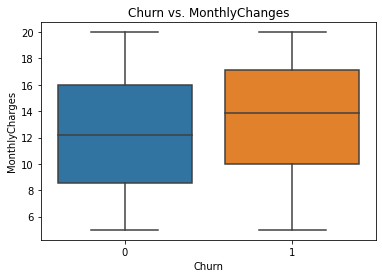

In [16]:
# visualization
sns.boxplot(x='Churn', y='MonthlyCharges', data=one_hot_encoded_data).set(title='Churn vs. MonthlyChanges')


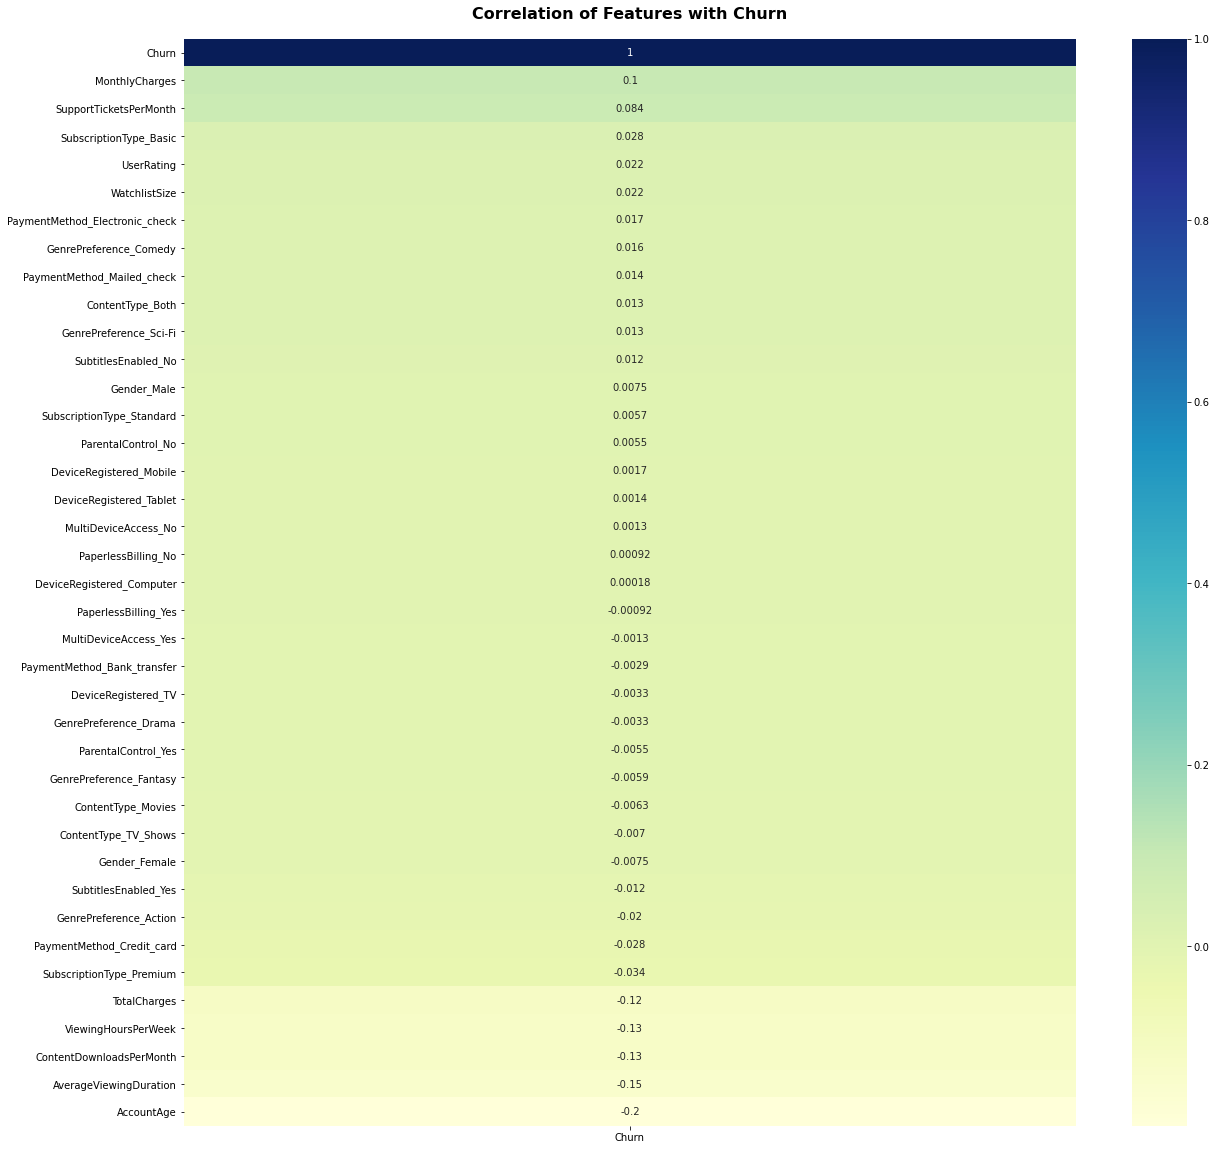

In [17]:
plt.figure(figsize=(20,20))

sns.heatmap(one_hot_encoded_data.corr()['Churn'].sort_values(ascending=False).to_frame(), annot=True, cmap="YlGnBu")

plt.title('Correlation of Features with Churn', fontsize=16, fontweight='bold', pad=20)
plt.show()

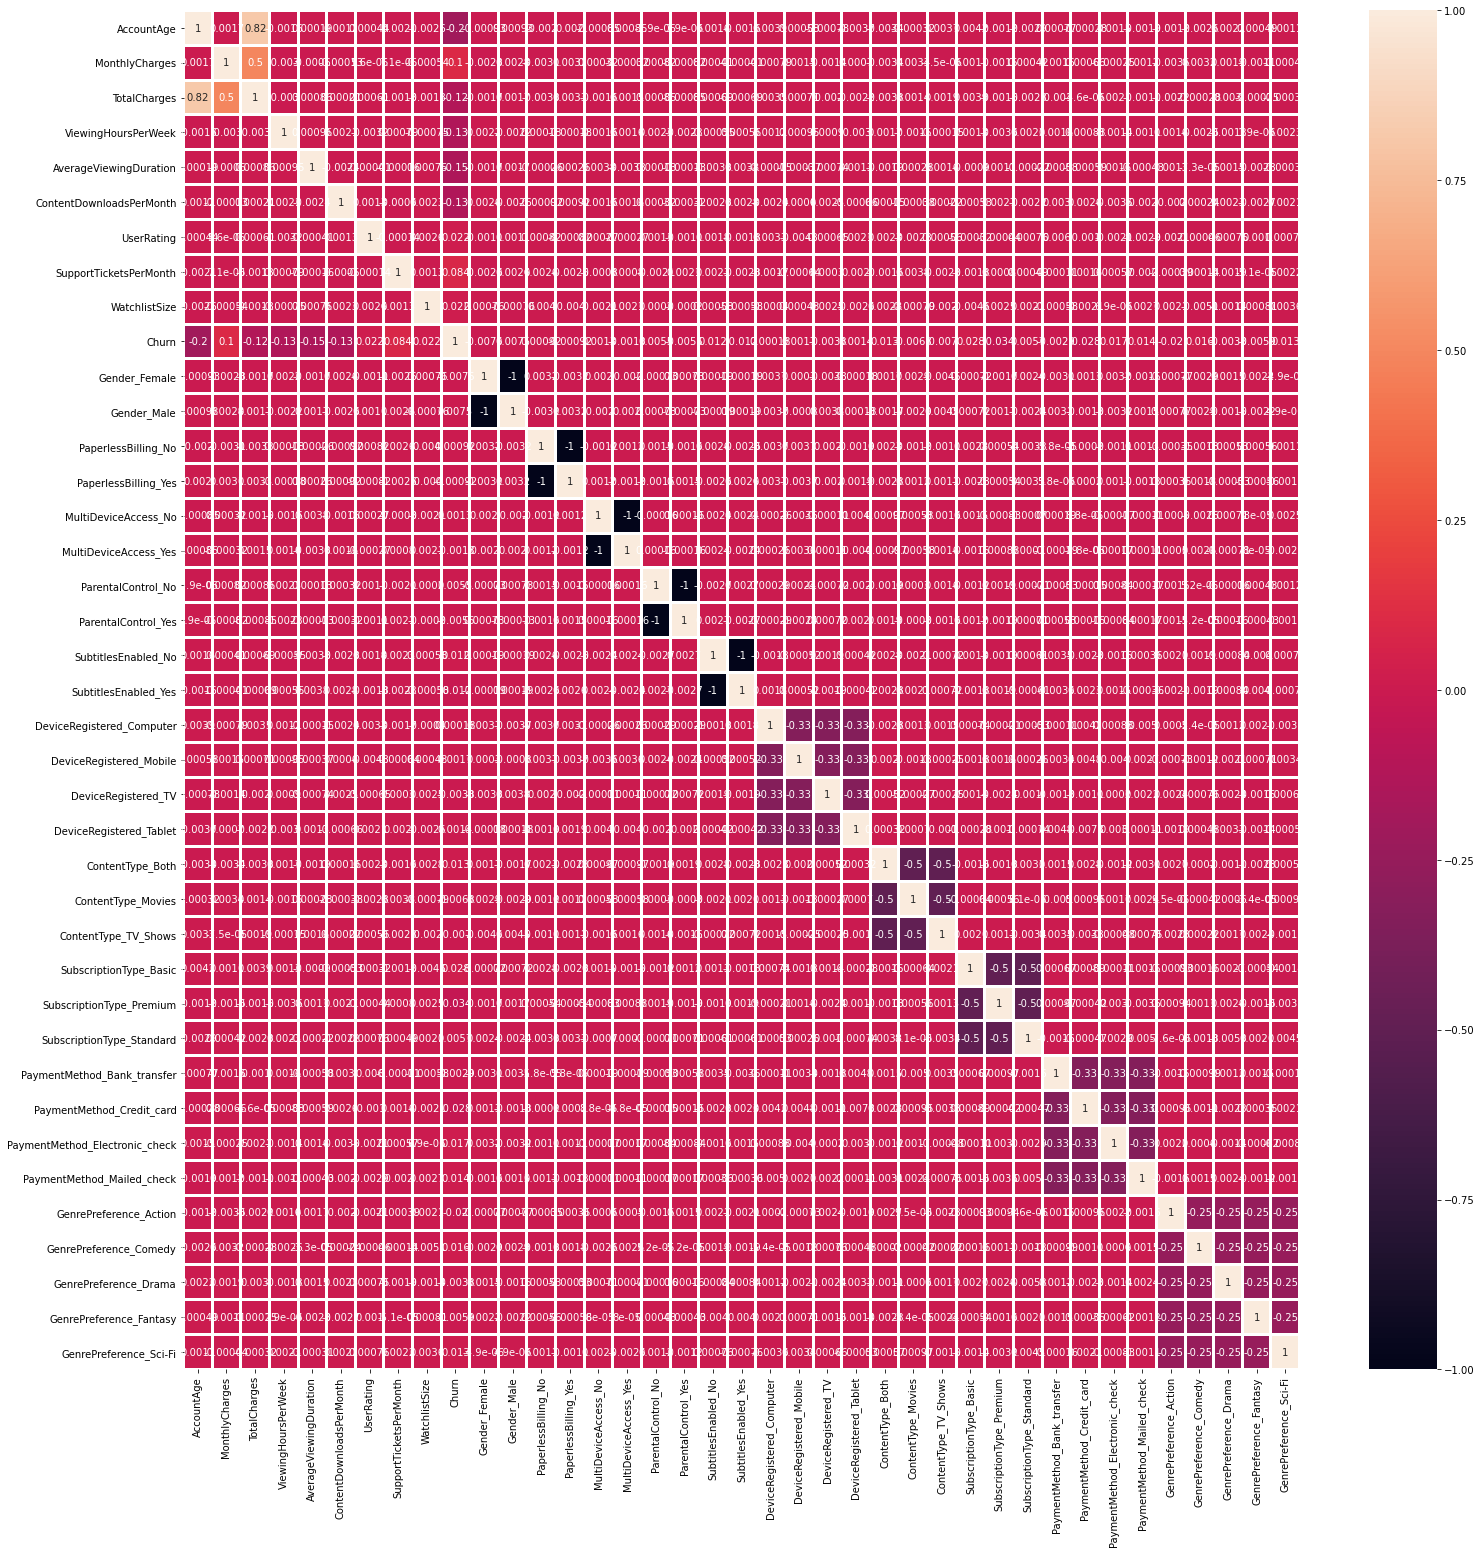

In [18]:
plt.figure(figsize=(25,25))

# plotting correlation heatmap 
dataplot=sns.heatmap(one_hot_encoded_data.corr(), annot = True, linewidth = 2) 
  
# displaying heatmap 
plt.show()

## Make predictions 


In [ ]:
one_hot_encoded_data = one_hot_encoded_data.drop(['CustomerID',  
                                                  'TotalCharges', 'Gender_Male', 'Gender_Female'],axis=1)

X = one_hot_encoded_data.drop(['Churn'],axis=1)
y = one_hot_encoded_data['Churn']


In [20]:
#one_hot_encoded_data = preprocessing.normalize(one_hot_encoded_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# -----------------------------------
# random forest classifier -- 82-73

rf = RandomForestClassifier(random_state=46)
dummy_clf = rf.fit(X_train,y_train)

preds = rf.predict(X_test)
print('Random forest acc : ')
print(accuracy_score(preds,y_test))
score = cross_val_score(dummy_clf, X, y, cv=10, scoring='roc_auc').mean() 
print(score)
# -------------------------------------

# -------------------------------------
# Decision tree classifier -- 72 - 56

dt = DecisionTreeClassifier(random_state=46)
dummy_clf = dt.fit(X_train,y_train)

preds = dt.predict(X_test)
print('Decision tree : ')
print(accuracy_score(preds,y_test))
score = cross_val_score(dummy_clf, X, y, cv=10, scoring='roc_auc').mean() 
print(score)
# -------------------------------------

# ------------------------------------- 
# KNeighbors Classifier -- 79-63

kn = KNeighborsClassifier()
dummy_clf = kn.fit(X_train,y_train)

preds = kn.predict(X_test)
print('KNeighbors Classifier : ')
print(accuracy_score(preds,y_test))
score = cross_val_score(dummy_clf, X, y, cv=10, scoring='roc_auc').mean() 
print(score)
# -------------------------------------

# -------------------------------------
# Ada Boost classifier -- 82-74,28

ab = AdaBoostClassifier(random_state=46)
dummy_clf = ab.fit(X_train,y_train)

preds = ab.predict(X_test)
print('Ada Boost : ')
print(accuracy_score(preds,y_test))
score = cross_val_score(dummy_clf, X, y, cv=10, scoring='roc_auc').mean() 
print(score)
# -------------------------------------


# ------------------------------------- 
# Logistic regression -- 82-74,77

lg = LogisticRegression(random_state=46)
dummy_clf = lg.fit(X_train,y_train)

preds = lg.predict(X_test)
print('Logistic regression : ')
print(accuracy_score(preds,y_test))
score = cross_val_score(dummy_clf, X, y, cv=10, scoring='roc_auc').mean() 
print(score)
# -------------------------------------


Random forest acc : 
0.8220385332504662
0.7284013811891705
Decision tree : 
0.7280546923555004
0.5601352966208646
KNeighbors Classifier : 
0.7984213797389683
0.6428229651417585
Ada Boost : 
0.8236793039154755
0.7428431390520962
Logistic regression : 
0.8247358607830951
0.7500440102503018


In [ ]:
# Plotting the ROC curve

plot_roc_curve(dummy_clf, X_test, y_test)
plt.show()

In [ ]:
predicted_probability = dummy_clf.predict_proba(one_hot_encoded_test_data.drop(['CustomerID'], axis=1))[:, 1]

In [ ]:
prediction_df = pd.DataFrame({'CustomerID': one_hot_encoded_test_data[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
print(prediction_df.shape)
prediction_df.head(10)